# ***MOVIE RATING PREDICTION WITH PYTHON-CodeSoft Internship 1***

 #  Import libraries...

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  Load the dataset

In [31]:
data = pd.read_csv("IMDb Movies India.csv", encoding='latin1')
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


# View top rows

In [10]:
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

# Basic info

In [11]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


# Check for missing values

In [12]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


# Fill missing values (simple way)

In [15]:
# Fill missing values for Rating with the mean
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

# Note: Missing values in other columns (Year, Duration, Genre, Votes, Director, Actor 1, Actor 2, Actor 3)
# still need to be handled based on their data types and analysis requirements.

/tmp/ipython-input-1731849860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].mean(), inplace=True)


# Drop rows with missing 'Rating'

In [16]:
data.dropna(subset=['Rating'], inplace=True)

# Encode categorical columns

In [19]:
data['Genre'] = data['Genre'].astype('category').cat.codes
data['Director'] = data['Director'].astype('category').cat.codes
data['Actor 1'] = data['Actor 1'].astype('category').cat.codes
data['Actor 2'] = data['Actor 2'].astype('category').cat.codes
data['Actor 3'] = data['Actor 3'].astype('category').cat.codes

# Feature selection

In [22]:
# Convert 'Votes' to numeric, handling potential errors
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce').fillna(0)

# Select features and target variable
features = ['Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = data[features]
y = data['Rating']

# Split the data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions

In [26]:
predictions = model.predict(X_test)

# Evaluate the model


In [28]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Model Performance:
Mean Squared Error: 0.96
R² Score: 0.00


In [ ]:
# Plot actual vs predicted

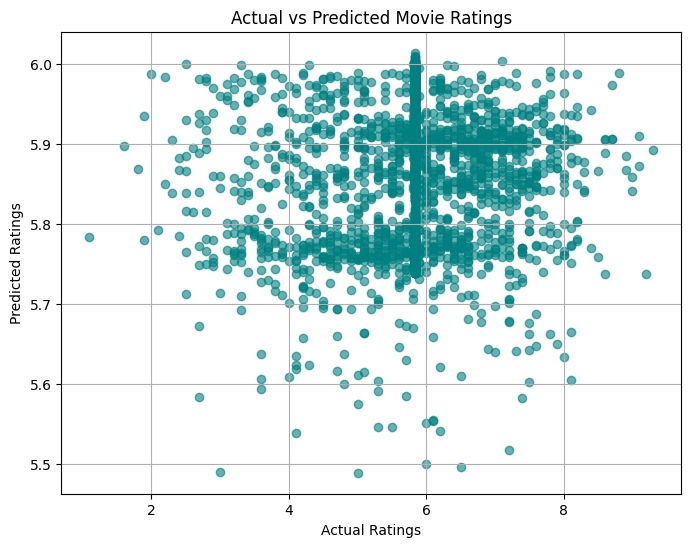

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='teal')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.savefig("Actual vs Predicted Movie Ratings.png")
plt.show()

In [34]:
from google.colab import files
files.download("Actual vs Predicted Movie Ratings.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>